In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 퍼셉트론의 한계

In [2]:
class 퍼셉트론:
    def __init__(self):
        self.w = None
        self.b = None

    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1)
        return y

    def 학습(self, Xs, ys, 학습횟수, 학습률=1.0):
        assert len(Xs) == len(ys)
        # 매개변수 초기화
        s, n = Xs.shape
        self.w = np.zeros(n, dtype='float32')
        self.b = 0.0

        for 에폭 in range(학습횟수):
            print(f'[학습 {에폭}] w={self.w}, b={self.b}')
            for xi, yi in zip(Xs, ys):
                output = self(xi)
                error = yi - output
                갱신 = error * 학습률
                self.w += 갱신 * xi
                self.b += 갱신

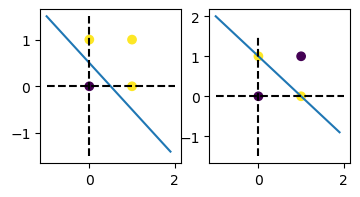

In [3]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

z0 = lambda x1, w, b: (w[0] * x1 + b) / -w[1]
x1 = np.arange(-1.0, 2.0, 0.1)

plt.figure(figsize=(4, 2))
# OR
plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or)
plt.plot(x1, z0(x1, w=np.array([1.0, 1.0]), b=-0.5))
# 보조선
plt.hlines(y=0, xmin=-1.0, xmax=2.0, linestyle='--', color='black')
plt.vlines(x=0, ymin=-1.5, ymax=1.5, linestyle='--', color='black')
# XOR
plt.subplot(1, 2, 2)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_xor)
plt.plot(x1, z0(x1, w=np.array([-0.2, -0.2]), b=0.2))
# 보조선
plt.hlines(y=0, xmin=-1.0, xmax=2.0, linestyle='--', color='black')
plt.vlines(x=0, ymin=-1.5, ymax=1.5, linestyle='--', color='black')
plt.show()

In [4]:
model = 퍼셉트론()
model.학습(Xs, ys=np.array([-1, 1, 1, -1]), 학습횟수=5, 학습률=0.1)

[학습 0] w=[0. 0.], b=0.0
[학습 1] w=[-2.0000000e-01  2.9802323e-09], b=0.0
[학습 2] w=[-0.2 -0.2], b=0.0
[학습 3] w=[-0.2 -0.2], b=0.2
[학습 4] w=[-0.2 -0.2], b=0.2


R2=0.978 < 1.0


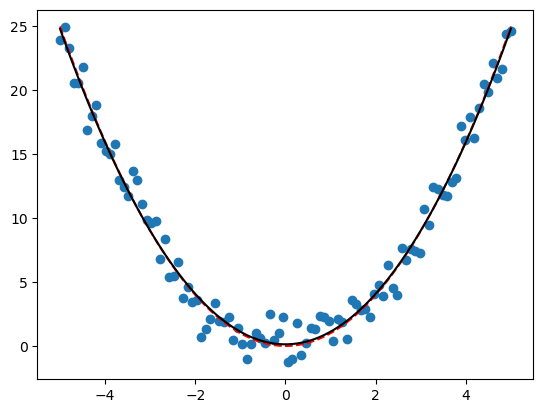

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

random = np.random.RandomState(123)
x = np.linspace(-5, 5, 100)
noise = random.randn(len(x))
y = x ** 2 + noise

Xs = x.reshape(-1, 1)
X2 = np.hstack([Xs, Xs ** 2])
model = LinearRegression()
model.fit(X2, y)
print(f'R2={r2_score(y, model.predict(X2)):.3f} < {r2_score(y, y)}')

plt.scatter(x, y)
plt.plot(x, y - noise, 'r--')
plt.plot(x, model.predict(X2), 'k')
plt.show()

In [10]:
boston = pd.read_csv('data/boston.csv')
boston.sample(5)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
350,22.9,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
39,30.8,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
256,44.0,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
225,50.0,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [11]:
y = boston['Price']

In [12]:
Xs = boston.drop(columns='Price').to_numpy()
Xs.shape

(506, 13)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(Xs, test_size=0.25, shuffle=True)
print(f'{len(Xs)} = {len(X_train)} + {len(X_test)}')

506 = 379 + 127


In [14]:
주택가격모형 = LinearRegression()
주택가격모형.fit(Xs, y)
print(f'R2={주택가격모형.score(Xs, y):.3f}')

R2=0.741


In [15]:
X2 = np.hstack([Xs, Xs ** 2])
print(f'X={Xs.shape} -> X2={X2.shape}')

X=(506, 13) -> X2=(506, 26)


In [16]:
주택가격모형 = LinearRegression()
주택가격모형.fit(X2, y)
print(f'R2={주택가격모형.score(X2, y):.3f}')

R2=0.831
